## preperation

In [131]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from dmba import classificationSummary 
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

In [4]:
bank = pd.read_csv('UniversalBank.csv')

In [5]:
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
# drop the not needed columns
bank.drop(columns = ['ID','ZIP Code'], axis = 1, inplace = True)

In [11]:
bank.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [33]:
# bin the age column into 6 bins 
bank['Age'] = pd.cut(bank.Age, bins = 6, labels = [1,2,3,4,5,6])

In [27]:
# binn the Experince column into 10 bins
bank['Experience'] = pd.cut(bank.Experience, bins = 10, labels = [1,2,3,4,5,6,7,8,9,10])

In [29]:
# binn the income column into 10 labels
bank['Income'] = pd.cut(bank.Income, bins = 10, labels = [1,2,3,4,5,6,7,8,9,10])

In [38]:
bank.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,1,2,4,1.6,1,0,0,1,0,0,0
1,3,5,2,3,1.5,1,0,0,1,0,0,0
2,3,4,1,1,1.0,1,0,0,0,0,0,0
3,2,3,5,1,2.7,2,0,0,0,0,0,0
4,2,3,2,4,1.0,2,0,0,0,0,0,1


In [39]:
# slit the data into data and target
x = bank.drop(columns = 'Personal Loan')
y = bank['Personal Loan']

In [40]:
x.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,1,2,4,1.6,1,0,1,0,0,0
1,3,5,2,3,1.5,1,0,1,0,0,0
2,3,4,1,1,1.0,1,0,0,0,0,0
3,2,3,5,1,2.7,2,0,0,0,0,0
4,2,3,2,4,1.0,2,0,0,0,0,1


In [41]:
# split the data to train and validation %40 test 
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size = 0.4,
                                                   random_state =1)

In [42]:
train_x.shape

(3000, 11)

## KNeighbor
with confusion matrix

In [119]:

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_x, train_y)
y_pred = knn.predict(test_x)
classes = knn.classes_
# getting the probablity for 1
knn_proba = knn.predict_proba(test_x)[:, 1]
# gettignt the accuracy score with confusion matrix
classificationSummary(test_y, y_pred, class_names = classes)

Confusion Matrix (Accuracy 0.9325)

       Prediction
Actual    0    1
     0 1774   33
     1  102   91


In [120]:
# accuracy score
print('Accuracy score for predicted: ',accuracy_score(y_true = test_y,y_pred = y_pred))

Accuracy score for predicted:  0.9325


## Naive
with confusion matrix

In [121]:
naive = MultinomialNB()
naive.fit(train_x, train_y)
naive_pred = naive.predict(test_x)
naive_classes = naive.classes_
# getting the probablity for 1
naive_proba = naive.predict_proba(test_x)[:, 1]
# gettignt the accuracy score with the confusio matrix 
classificationSummary(test_y,naive_pred, class_names =naive_classes)

Confusion Matrix (Accuracy 0.7395)

       Prediction
Actual    0    1
     0 1413  394
     1  127   66


In [122]:
# the accuaracy score
print('Accuracy score for predicted: ',accuracy_score(y_true = test_y,y_pred = naive_pred))

Accuracy score for predicted:  0.7395


## DecisionTree 
with confusion matrix

In [123]:
clt = DecisionTreeClassifier(random_state = 1)
clt.fit(train_x,train_y)
clt_pred = clt.predict(test_x)
clt_classes = clt.classes_
# getting the probablity for 1
clt_proba = clt.predict_proba(test_x)[:, 1]
# gettignt the accuracy score with confusion matrix
classificationSummary(test_y, clt_pred, class_names = clt_classes)

Confusion Matrix (Accuracy 0.9835)

       Prediction
Actual    0    1
     0 1791   16
     1   17  176


In [124]:
# getting the accuracy score 
print('Accuracy score for predicted: ',accuracy_score(y_true = test_y,y_pred = clt_pred))

Accuracy score for predicted:  0.9835


In [127]:
# creating a dataFrame with  the actual and predicted data and the probalblity
# of being '1' for all three models
new_data = pd.DataFrame({'actual':test_y,'preddicted_DT':clt_pred,
                         'preddicted_Naive':naive_pred,'preddicted_knn':y_pred,
                         'proba_Dt_1':clt_proba ,'proba_Naive_1':naive_proba,'proba_knn_1':knn_proba})
new_data.head(10)

,actual,preddicted_DT,preddicted_Naive,preddicted_knn,proba_Dt_1,proba_Naive_1,proba_knn_1
2764,0,0,1,0,0.0,0.973563,0.0
4767,0,0,1,0,0.0,0.848983,0.0
3814,0,0,0,0,0.0,0.002104,0.0
3499,0,0,1,0,0.0,1.000000,0.0
2735,0,0,1,0,0.0,0.998490,0.0
3922,0,0,0,0,0.0,0.000866,0.0
2701,0,0,0,0,0.0,0.000080,0.0
1179,0,0,0,0,0.0,0.000458,0.0
932,0,0,0,0,0.0,0.000126,0.0
792,0,1,0,0,1.0,0.001057,0.0


In [126]:
new_data.shape

(2000, 7)

In [128]:
# creating a column with the average of the probalities
new_data['Average'] = new_data[['proba_Dt_1','proba_Naive_1','proba_knn_1']].mean(axis = 1)

In [129]:
new_data.head(10)

,actual,preddicted_DT,preddicted_Naive,preddicted_knn,proba_Dt_1,proba_Naive_1,proba_knn_1,Average
2764,0,0,1,0,0.0,0.973563,0.0,0.324521
4767,0,0,1,0,0.0,0.848983,0.0,0.282994
3814,0,0,0,0,0.0,0.002104,0.0,0.000701
3499,0,0,1,0,0.0,1.000000,0.0,0.333333
2735,0,0,1,0,0.0,0.998490,0.0,0.332830
3922,0,0,0,0,0.0,0.000866,0.0,0.000289
2701,0,0,0,0,0.0,0.000080,0.0,0.000027
1179,0,0,0,0,0.0,0.000458,0.0,0.000153
932,0,0,0,0,0.0,0.000126,0.0,0.000042
792,0,1,0,0,1.0,0.001057,0.0,0.333686


In [132]:
# creatign voting for the models 
models= [('DecisionTree',clt),('naive',naive),('knn',knn)]
vote = VotingClassifier(estimators = models, voting = 'hard')

In [133]:
vote.fit(train_x, train_y)

VotingClassifier(estimators=[('DecisionTree',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state

In [136]:
vote_pred = vote.predict(test_x)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [144]:
# getting the accuracy score for the voting
print('accuracy score for voting:' , accuracy_score(test_y, vote_pred))

accuracy score for voting: 0.954


In [137]:
# add the voting prediction into the new dataset
new_data['vote'] = vote_pred

In [139]:
# final dataset as requested with average and vote columns added
new_data.head(10)

,actual,preddicted_DT,preddicted_Naive,preddicted_knn,proba_Dt_1,proba_Naive_1,proba_knn_1,Average,vote
2764,0,0,1,0,0.0,0.973563,0.0,0.324521,0
4767,0,0,1,0,0.0,0.848983,0.0,0.282994,0
3814,0,0,0,0,0.0,0.002104,0.0,0.000701,0
3499,0,0,1,0,0.0,1.000000,0.0,0.333333,0
2735,0,0,1,0,0.0,0.998490,0.0,0.332830,0
3922,0,0,0,0,0.0,0.000866,0.0,0.000289,0
2701,0,0,0,0,0.0,0.000080,0.0,0.000027,0
1179,0,0,0,0,0.0,0.000458,0.0,0.000153,0
932,0,0,0,0,0.0,0.000126,0.0,0.000042,0
792,0,1,0,0,1.0,0.001057,0.0,0.333686,0


In [153]:
# compare the error rate for all the models incloding boosting and bagging

from sklearn.metrics import mean_squared_error
print('Error Rate for KNN:',mean_squared_error(test_y, y_pred),
    'Error Rate for Naive:',mean_squared_error(test_y, naive_pred),
     'Error Rate for DecisionTree:',mean_squared_error(test_y, clt_pred),
     'Error Rate for Bagging:',mean_squared_error(test_y,bagging_pred),
     'Error Rate for Boosting:',mean_squared_error(test_y, boost_pred))

Error Rate for KNN: 0.0675 Error Rate for Naive: 0.2605 Error Rate for DecisionTree: 0.0165 Error Rate for Bagging: 0.021 Error Rate for Boosting: 0.0165


## Part B

##  Bagging

In [55]:
bagging = BaggingClassifier(DecisionTreeClassifier(random_state = 1),
                            n_estimators = 100, random_state = 1)
bagging.fit(train_x,train_y)
bagging_pred= bagging.predict(test_x)
classificationSummary(test_y,bagging_pred,class_names = clt_classes)

Confusion Matrix (Accuracy 0.9790)

       Prediction
Actual    0    1
     0 1796   11
     1   31  162


In [72]:
print('Accuracy score for predicted: ',accuracy_score(y_true = test_y,y_pred = bagging_pred))

Accuracy score for predicted:  0.979


## boosting

In [56]:
boosting = AdaBoostClassifier(DecisionTreeClassifier(random_state = 1), 
                             n_estimators = 100, random_state = 1)
boosting.fit(train_x, train_y)
boost_pred = boosting.predict(test_x)
classificationSummary(test_y, boost_pred, class_names = clt_classes)

Confusion Matrix (Accuracy 0.9835)

       Prediction
Actual    0    1
     0 1792   15
     1   18  175


In [73]:
print('Accuracy score for predicted: ',accuracy_score(y_true = test_y,y_pred = boost_pred))

Accuracy score for predicted:  0.9835


In [177]:
# import cross_validation and KFold to compare the models
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [178]:
# compare the models 
models = []
models.append(('Boosting',boosting))
models.append(('Bagging', bagging))
models.append(('KNN', knn))
models.append(('naive', naive))
models.append(('DecisionTree', clt))
models

[('Boosting',
  AdaBoostClassifier(algorithm='SAMME.R',
                     base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                           class_weight=None,
                                                           criterion='gini',
                                                           max_depth=None,
                                                           max_features=None,
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_split=2,
                                                           min_weight_fraction_leaf=0.0,
                                                           preso

In [183]:
result = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits = 10)
    cv_val = cross_val_score(model, x,y,cv = kfold,
                                             scoring = 'accuracy')
    result.append(cv_val)
    names.append(name)
    massage = (name, cv_val.mean(), cv_val.std())
    print(massage)
    

('Boosting', 0.9867999999999999, 0.0040199502484483595)
('Bagging', 0.9880000000000001, 0.00419523539268061)
('KNN', 0.943, 0.008729261137118055)
('naive', 0.7289999999999999, 0.027103505308354495)
('DecisionTree', 0.986, 0.004898979485566361)


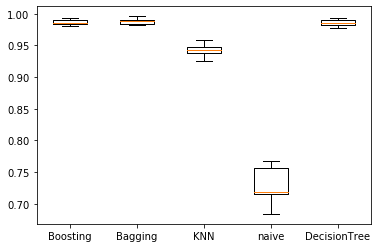

In [184]:
# plot the comparison 
figure= plt.figure()
axes = figure.add_subplot(111)
plt.boxplot(result)
axes.set_xticklabels(names)
plt.show()